<a href="https://colab.research.google.com/github/Lisasilva/Crime-Analysis-in-India/blob/main/Crime_analysis_DMPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import files***

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

%matplotlib inline

***Read the dataset***

In [ ]:
Crime_dataset =  pd.read_csv('_42_Cases_under_crime_against_women_.csv')

***Display Dataset***

In [ ]:
Crime_dataset


,Area_Name,Year,Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Unnamed: 21
0,Andaman & Nicobar Islands,2001,Rape,5,2,3,0,0,0,5,...,3,34,36,3,3,5,0,0,39,NaN
1,Andhra Pradesh,2001,Rape,731,22,769,35,197,74,791,...,390,1974,2170,871,769,928,2,0,2937,NaN
2,Arunachal Pradesh,2001,Rape,1,2,25,0,2,0,27,...,12,282,260,33,25,3,0,0,285,NaN
3,Assam,2001,Rape,334,95,495,10,101,45,590,...,863,1964,1914,817,495,435,0,0,2409,NaN
4,Bihar,2001,Rape,406,141,685,0,155,105,826,...,531,3185,3061,888,685,561,0,0,3746,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,Tamil Nadu,2010,Total Crime Against Women,2823,565,4780,13,1749,708,5345,...,2292,12558,12363,6708,4780,4572,0,0,17143,NaN
4161,Tripura,2010,Total Crime Against Women,683,102,1360,74,95,15,1462,...,214,3967,3459,1678,1360,778,0,0,4819,NaN
4162,Uttar Pradesh,2010,Total Crime Against Women,6976,3746,14401,366,10307,1704,18147,...,2236,45418,48666,20169,14401,17283,0,0,63067,NaN
4163,Uttarakhand,2010,Total Crime Against Women,308,185,864,17,499,47,1049,...,134,2997,2957,1074,864,807,0,0,3821,NaN


In [ ]:
Crime_dataset.describe()  #describes the dataframe(2d table) wrt to its statistical values

,Year,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,Cases_not_Investigated_or_in_which_investigation_was_refused,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Unnamed: 21
count,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,1400.000000
mean,2005.478992,949.907563,47.730372,606.186074,75.938295,123.834094,80.463145,651.589436,16.302041,251.935894,233.133974,2300.568788,2184.844178,764.534214,621.318607,425.594958,14.024970,0.331333,2769.029292,104.162857
std,2.875474,1125.158434,187.517840,1937.922054,347.583903,528.553328,376.236593,2052.516005,159.188872,940.510830,848.996002,8122.609836,7616.844927,2316.584301,1939.769271,1305.666845,154.956691,4.207364,9370.433464,419.820738
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,376.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,4.000000,14.000000,27.000000,16.000000,8.000000,5.000000,0.000000,0.000000,9.000000,0.000000
75%,2008.000000,1961.000000,18.000000,265.000000,8.000000,43.000000,17.000000,290.000000,0.000000,84.000000,86.000000,802.000000,813.000000,399.000000,298.000000,232.000000,0.000000,0.000000,1056.000000,7.000000
max,2010.000000,11606.000000,3746.000000,23851.000000,5231.000000,10307.000000,7358.000000,25353.000000,5231.000000,17892.000000,16529.000000,114591.000000,110593.000000,27244.000000,23851.000000,17283.000000,5078.000000,153.000000,125253.000000,5539.000000


***Data preprocessing***

1.Data cleaning

In [ ]:
features = ["Area_Name","Year","Group_Name","Cases_Chargesheeted","Cases_Convicted","Cases_Reported"]
data = Crime_dataset[features].copy()
data

,Area_Name,Year,Group_Name,Cases_Chargesheeted,Cases_Convicted,Cases_Reported
0,Andaman & Nicobar Islands,2001,Rape,3,0,3
1,Andhra Pradesh,2001,Rape,769,197,871
2,Arunachal Pradesh,2001,Rape,25,2,33
3,Assam,2001,Rape,495,101,817
4,Bihar,2001,Rape,685,155,888
...,...,...,...,...,...,...
4160,Tamil Nadu,2010,Total Crime Against Women,4780,1749,6708
4161,Tripura,2010,Total Crime Against Women,1360,95,1678
4162,Uttar Pradesh,2010,Total Crime Against Women,14401,10307,20169
4163,Uttarakhand,2010,Total Crime Against Women,864,499,1074


***Using the elbow method to find out the optimal number of clusters.***

Interpretation of a line plot with an elbow shape. The number of clusters is were the elbow bends.
  The x axis of the plot is the number of clusters and the y axis is the Within Clusters Sum of Squares (WCSS) between each point and the centroid in a cluster.

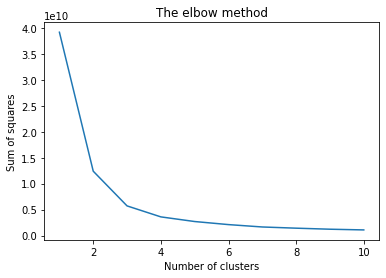

In [ ]:
x = data.iloc[:, [3, 4, 5]].values
sumofsquares = []  #Sum of squared distances of samples to their closest cluster center.

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sumofsquares.append(kmeans.inertia_)

#Elbow Method
plt.plot(range(1, 11), sumofsquares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares')
plt.show()

From the scatter plot it can be seen that the rate of change sharply shifts at number of clusters = 3.Hence,the optimum Number of Clusters is 3. Applying the clusters to the dataset.

## **K-means clustering is an unsupervised learning technique to classify unlabeled data by grouping them by features, rather than pre-defined categories**

high performance

unlabeled data

works well on huge datasets

***1.Scaling the data***

In [ ]:
features = ["Cases_Chargesheeted","Cases_Convicted","Cases_Reported"]
finalData = data.dropna(subset=features)
finalData = data[features].copy()
finalData = ((finalData - finalData.min())/ (finalData.max() - finalData.min())) * 9 + 1
finalData.describe()

,Cases_Chargesheeted,Cases_Convicted,Cases_Reported
count,4165.000000,4165.000000,4165.000000
mean,1.228740,1.108131,1.252562
std,0.731261,0.461529,0.765279
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.001132,1.000000,1.005286
75%,1.099996,1.037547,1.131809
max,10.000000,10.000000,10.000000


In [ ]:
finalData.head()    #final dataframe that will be used

,Cases_Chargesheeted,Cases_Convicted,Cases_Reported
0,1.001132,1.000000,1.000991
1,1.290177,1.172019,1.287733
2,1.009434,1.001746,1.010901
3,1.186785,1.088192,1.269894
4,1.258480,1.135345,1.293349


***2.Initialize random centroids***

In [ ]:
def random_centroids(finalData, k):
  centroids = []
  for i in range(k):
    centroid = finalData.apply(lambda x: float(x.sample()))   #lambda ---> anonymous function that can take any number of arguments and execute an expression
    centroids.append(centroid)                                #x = data.iloc[:, [3, 4, 5]].values
  return pd.concat(centroids, axis=1)

***3.Label each data point using Euclidean distances***

In [ ]:
def get_labels(finalData, centroids):         #Euclidean distances
  distances = centroids.apply(lambda x: np.sqrt(((finalData - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)

***4.Update centroids***

In [ ]:
def new_centroids(finalData, labels, k):
  return finalData.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
max_iterations = 100
k = 3                                              #k=3 ,optimal clusters

centroids = random_centroids(finalData, k)         #Function call for randon_centroids with k=3 as found out by elbow method
old_centroids = pd.DataFrame()
iteration = 1

***5.Repeat steps 3 and 4 until the new centroids are equal to the old centroids***

In [ ]:
while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(finalData, centroids)        #Fucntion call for get_labels()
  centroids = new_centroids(finalData, labels, k)  #fucntion call for new_centroids()
  iteration += 1
centroids                                          #gives the centroid values to the scaled data, table value changes with changing centroids

,0,1,2
Cases_Chargesheeted,2.343408,1.051388,5.697377
Cases_Convicted,1.555180,1.023733,3.047140
Cases_Reported,2.423850,1.064739,5.919196


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
data['cluster'] = y_kmeans
data   # Add an extra column to show which row belongs to which cluster

,Area_Name,Year,Group_Name,Cases_Chargesheeted,Cases_Convicted,Cases_Reported,cluster
0,Andaman & Nicobar Islands,2001,Rape,3,0,3,0
1,Andhra Pradesh,2001,Rape,769,197,871,0
2,Arunachal Pradesh,2001,Rape,25,2,33,0
3,Assam,2001,Rape,495,101,817,0
4,Bihar,2001,Rape,685,155,888,0
...,...,...,...,...,...,...,...
4160,Tamil Nadu,2010,Total Crime Against Women,4780,1749,6708,1
4161,Tripura,2010,Total Crime Against Women,1360,95,1678,0
4162,Uttar Pradesh,2010,Total Crime Against Women,14401,10307,20169,2
4163,Uttarakhand,2010,Total Crime Against Women,864,499,1074,0


Display cluster-wise tables

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data1  #First Cluster


,Area_Name,Year,Group_Name,Cases_Chargesheeted,Cases_Convicted,Cases_Reported,cluster
0,Andaman & Nicobar Islands,2001,Rape,3,0,3,0
1,Andhra Pradesh,2001,Rape,769,197,871,0
2,Arunachal Pradesh,2001,Rape,25,2,33,0
3,Assam,2001,Rape,495,101,817,0
4,Bihar,2001,Rape,685,155,888,0
...,...,...,...,...,...,...,...
4156,Puducherry,2010,Total Crime Against Women,109,21,115,0
4157,Punjab,2010,Total Crime Against Women,1932,497,2853,0
4159,Sikkim,2010,Total Crime Against Women,58,6,42,0
4161,Tripura,2010,Total Crime Against Women,1360,95,1678,0


In [ ]:
data2

,Area_Name,Year,Group_Name,Cases_Chargesheeted,Cases_Convicted,Cases_Reported,cluster
19,Madhya Pradesh,2001,Rape,2616,589,2851,1
54,Madhya Pradesh,2002,Rape,2804,548,2891,1
124,Madhya Pradesh,2004,Rape,2815,669,2875,1
159,Madhya Pradesh,2005,Rape,2780,702,2921,1
194,Madhya Pradesh,2006,Rape,2779,748,2900,1
...,...,...,...,...,...,...,...
4145,Jharkhand,2010,Total Crime Against Women,2607,618,3087,1
4146,Karnataka,2010,Total Crime Against Women,7282,511,8807,1
4147,Kerala,2010,Total Crime Against Women,8871,637,9463,1
4155,Odisha,2010,Total Crime Against Women,8635,485,8501,1


In [ ]:
data3

,Area_Name,Year,Group_Name,Cases_Chargesheeted,Cases_Convicted,Cases_Reported,cluster
1961,Andhra Pradesh,2007,Cruelty by Husband and Relatives,9738,979,11335,2
2029,West Bengal,2008,Cruelty by Husband and Relatives,10225,196,13663,2
2064,West Bengal,2009,Cruelty by Husband and Relatives,13647,134,16112,2
2066,Andhra Pradesh,2010,Cruelty by Husband and Relatives,11459,756,12080,2
2099,West Bengal,2010,Cruelty by Husband and Relatives,16946,148,17796,2
3851,Andhra Pradesh,2001,Total Crime Against Women,13848,4765,16477,2
3869,Madhya Pradesh,2001,Total Crime Against Women,13924,2960,14549,2
3870,Maharashtra,2001,Total Crime Against Women,12255,659,12524,2
3880,Tamil Nadu,2001,Total Crime Against Women,9666,7225,10111,2
3882,Uttar Pradesh,2001,Total Crime Against Women,15566,6690,20227,2


***6.Plotting the Scatter plot for the above clusters***

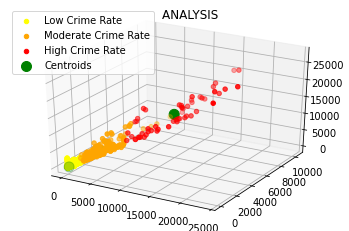

In [ ]:
# 3D Scatter Plot
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.Cases_Chargesheeted, data1.Cases_Convicted, data1.Cases_Reported, c='yellow', label = 'Low Crime Rate')
kplot.scatter3D(data2.Cases_Chargesheeted, data2.Cases_Convicted, data2.Cases_Reported,c ='orange', label = 'Moderate Crime Rate')
kplot.scatter3D(data3.Cases_Chargesheeted, data3.Cases_Convicted, data3.Cases_Reported,c ='red', label = 'High Crime Rate')

kplot.scatter3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], s = 100, c = 'Green', label = 'Centroids')

plt.legend()
plt.title("        ANALYSIS")
plt.show()



## *Inferences from the Clustering for different attributes*

In [ ]:
placelist=["Andaman & Nicobar Islands","Puducherry","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Lakshadweep","Rajasthan","Sikkim","Tamil Nadu","Tripura","Uttar Pradesh","Uttarakhand","Madhya Pradesh","Kerala","Andhra Pradesh","Daman & Diu","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Dadra & Nagar Haveli","Delhi","Karnataka","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","West Bengal"]
print(f'{f"PLACE":<40}{f"LOW CRIME RATE":<25}{f"MEDIUM CRIME RATE":<25}{f"HIGH CRIME RATE":<25}{f"RESULT"}')
for i in placelist:
  c0=0
  c1=0
  c2=0
  k=0
  for j in data.Area_Name:
    if i==j:
      if data.cluster[k]==0:
        c0+=1
      elif data.cluster[k]==1:
        c1+=1
      else:
        c2+=1
    k+=1
  if c0>c1 and c0>c2:
    Result="Low"
  elif c1>c0 and c1>c2:
    Result="Medium"
  else:
    Result="High"
  print(f'{f"{i}":<40}{f"{c0}":<25}{f"{c1}":<25}{f"{c2}":<25}{f"{Result}"}')


PLACE                                   LOW CRIME RATE           MEDIUM CRIME RATE        HIGH CRIME RATE          RESULT
Andaman & Nicobar Islands               119                      0                        0                        Low
Puducherry                              119                      0                        0                        Low
Maharashtra                             92                       18                       9                        Low
Manipur                                 119                      0                        0                        Low
Meghalaya                               119                      0                        0                        Low
Mizoram                                 119                      0                        0                        Low
Nagaland                                119                      0                        0                        Low
Odisha                                  109  

*As evident from the above table, all the major cities/states in india have Low Crime Rate*

In [ ]:
Crimelist=["Importation of Girls","Rape","Kidnapping & Abduction - Women & Girls","Dowry Deaths","Molestation","Sexual harassment","Cruelty by Husband and Relatives","Immoral Traffic (Prevention) Act","Indecent Representation of Women (Prohibition) Act","Sati Prevention Act","Total Crime Against Women"]
print(f'{f"CRIME":<60}{f"LOW CRIME RATE":<25}{f"MEDIUM CRIME RATE":<25}{f"HIGH CRIME RATE":<25}')
for i in Crimelist:
  c0=0
  c1=0
  c2=0
  k=0
  for j in data.Group_Name:
    if i==j:
      if data.cluster[k]==0:
        c0+=1
      elif data.cluster[k]==1:
        c1+=1
      else:
        c2+=1
    k+=1
  print(f'{f"{i}":<60}{f"{c0}":<25}{f"{c1}":<25}{f"{c2}":<25}')

CRIME                                                       LOW CRIME RATE           MEDIUM CRIME RATE        HIGH CRIME RATE          
Importation of Girls                                        700                      0                        0                        
Rape                                                        341                      9                        0                        
Kidnapping & Abduction - Women & Girls                      346                      4                        0                        
Dowry Deaths                                                350                      0                        0                        
Molestation                                                 316                      34                       0                        
Sexual harassment                                           340                      10                       0                        
Cruelty by Husband and Relatives                

*The table shows the prominent crimes in each cluster ie, in cluster 0(Low crime rate), Importation of Girls is the most prominent crime. Similarly, in cluster 1(moderate crime rate) and 2(high crime rate), Other Crimes ("total crime against women") are prominent*

In [ ]:
Yearlist=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
print(f'{f"YEAR":<20}{f"LOW CRIME RATE":<25}{f"MEDIUM CRIME RATE":<25}{f"HIGH CRIME RATE":<25}')
for i in Yearlist:
  c0=0
  c1=0
  c2=0
  k=0
  for j in data.Year:
    if i==j:
      if data.cluster[k]==0:
        c0+=1
      elif data.cluster[k]==1:
        c1+=1
      else:
        c2+=1
    k+=1
  if c0>c1 and c0>c2:
    Result="Low"
  elif c1>c0 and c1>c2:
    Result="Medium"
  else:
    Result="High"
  print(f'{f"{i}":<20}{f"{c0}":<25}{f"{c1}":<25}{f"{c2}":<25}')


YEAR                LOW CRIME RATE           MEDIUM CRIME RATE        HIGH CRIME RATE          
2001                394                      21                       5                        
2002                395                      21                       4                        
2003                396                      20                       4                        
2004                391                      23                       6                        
2005                391                      24                       5                        
2006                391                      23                       6                        
2007                388                      25                       7                        
2008                368                      16                       1                        
2009                386                      27                       7                        
2010                384                 

*2008 has the lowest crime rate whereas 2010 has the highest crime rate*

# *Silhouette Score*
Since Kmeans Clustering is an unsupervised learning algorithm. The methods like Confusion matrix (used for supervised learning algorithms) can't be used.
Therefore,Silhouette value is used for measuring the performance of classification problem. Other metrics to measure the performance of unsupervised clustering:

-Silhouette value

-Jacobians rules

-Similarity scores

-Density comparison

-Rand measure

In [ ]:
"""Silhouette Score,S , for each cluster
measure of how similar an object is to its own cluster(cohesion) compared to other clusters (separation)
high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

formula:  S = (b-a)/max(a, b)
where  'a' is the mean intra-cluster distance for each sample
 'b' is the mean nearest-cluster distance (b) for each sample"""

X, y = make_blobs(
    n_samples=4165,
    n_features=3,
    centers=3,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)
score = silhouette_score(X,y)
print(score)

0.7444622007021535


## Since its value is close to 1, it denotes that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.

**Workflow**

**Problem statement:**
The data which used for doing the analysis plays a key role in finding out the patterns, especially in crime analysis. In this, the dataset is obtained from Kaggle which contains different types of crimes which are occurring against women such as rape, kidnapping, dowry death, assault on women, cruelty against women, importation of young girls, insult to modesty and immoral traffic.


**Dataset:**
Dataset is from Kaggle. This dataset contains statistics of various crimes cases against women from the year 2001–2010 with State or Union Territories.

The dataset contains the various crimes stats like Rape, Domestic Violence, Dowry, etc. with the year and place of the crime.

**Techinique used, Clustering:**
Various researchers use different mining techniques for data mining, we have chosen clustering to detect crime patterns.

initially we began with unsupervised apriori algorithm , but as we progressed , we realised that the comparision between the two algo rithms is not very compatible, so we decided to choose a more relevant algorithm ie, DBSCAN

**Kmeans and DBScan**:
Code and complexity

DBSCAN is one of the many algorithms that is used for data segmentation. You can use K-means or Hierarchical clustering to get even better results.

**Conclusion and Result:**
Year wise
Crime wise
area wise


**Future Scope:**
we aim at developing our model further by including various other factors which play an important role in the analysis of the crime dataset. This includes taking into consideration

population of the area

education rate

male -female ratio

This can prove to be extremely helpful to the government agencies to analyse the crimes in each area.